In [0]:
# select tensorflow 2 in colab
%tensorflow_version 2.x

# install tensorflow 2 and tensorflow datasets on a personal machine
# !pip install tensorflow-gpu
# !pip install tensorflow-datasets

# tenorflow
import tensorflow as     tf
from   tensorflow import keras

# tensorflow datasets
import tensorflow_datasets as tfds

# additional libraries
import math
import numpy             as np
import matplotlib.pyplot as plt
# %matplotlib inline

# version check
# print(tf.__version__)
from __future__ import print_function
import tensorflow.keras
from tensorflow.keras.layers import Dense, Conv2D, BatchNormalization, Activation
from tensorflow.keras.layers import AveragePooling2D, Input, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model

import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat
from skimage import color
from skimage import io
from sklearn.model_selection import train_test_split
import scipy.io as sio
%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 4.0)

In [0]:
#chang

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

import tensorflow.keras
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Activation, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.applications import mobilenet_v2

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.applications import MobileNetV2

base_model= MobileNetV2(weights='imagenet', include_top=False,input_shape=(32, 32, 3)) #imports the mobilenet model and discards the last 1000 neuron layer.
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(32,activation='relu')(x) #dense layer 3
preds=Dense(10,activation='softmax')(x) #final layer with softmax activation

model=Model(inputs=base_model.input,outputs=preds)





In [0]:
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

In [43]:
model=Model(inputs=base_model.input,outputs=preds)
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 33, 33, 3)    0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 16, 16, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 16, 16, 32)   128         Conv1[0][0]                      
_______________________________________________________________________________

In [44]:
new_model=model
new_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 33, 33, 3)    0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 16, 16, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 16, 16, 32)   128         Conv1[0][0]                      
____________________________________________________________________________________________

In [45]:
for i,layer in enumerate(new_model.layers):
  print(i,layer.name, layer.trainable)

0 input_2 True
1 Conv1_pad True
2 Conv1 True
3 bn_Conv1 True
4 Conv1_relu True
5 expanded_conv_depthwise True
6 expanded_conv_depthwise_BN True
7 expanded_conv_depthwise_relu True
8 expanded_conv_project True
9 expanded_conv_project_BN True
10 block_1_expand True
11 block_1_expand_BN True
12 block_1_expand_relu True
13 block_1_pad True
14 block_1_depthwise True
15 block_1_depthwise_BN True
16 block_1_depthwise_relu True
17 block_1_project True
18 block_1_project_BN True
19 block_2_expand True
20 block_2_expand_BN True
21 block_2_expand_relu True
22 block_2_depthwise True
23 block_2_depthwise_BN True
24 block_2_depthwise_relu True
25 block_2_project True
26 block_2_project_BN True
27 block_2_add True
28 block_3_expand True
29 block_3_expand_BN True
30 block_3_expand_relu True
31 block_3_pad True
32 block_3_depthwise True
33 block_3_depthwise_BN True
34 block_3_depthwise_relu True
35 block_3_project True
36 block_3_project_BN True
37 block_4_expand True
38 block_4_expand_BN True
39 block

In [46]:
train_data = sio.loadmat('/content/drive/My Drive/Data/train_32x32.mat')
test_data = sio.loadmat('/content/drive/My Drive/Data/test_32x32.mat')
X_train, y_train = train_data['X'], train_data['y']
X_test, y_test = test_data['X'], test_data['y']
print("Training Set", X_train.shape, y_train.shape)
print("Test Set", X_test.shape, y_test.shape)
X_train, y_train = X_train.transpose((3,0,1,2)), y_train[:,0]
X_test, y_test = X_test.transpose((3,0,1,2)), y_test[:,0]
print("Training Set", X_train.shape)
print("Test Set", X_test.shape)
print('')


Training Set (32, 32, 3, 73257) (73257, 1)
Test Set (32, 32, 3, 26032) (26032, 1)
Training Set (73257, 32, 32, 3)
Test Set (26032, 32, 32, 3)



In [47]:
input_shape = X_train.shape[1:]
input_shape

(32, 32, 3)

In [0]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [0]:
y_train[y_train == 10] = 0
y_test[y_test == 10] = 0


In [50]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((73257, 32, 32, 3), (73257,), (26032, 32, 32, 3), (26032,))

In [13]:
SUBTRACT_PIXEL_MEAN = True
if SUBTRACT_PIXEL_MEAN:
    X_train_mean = np.mean(X_train, axis=0)
    X_train -= X_train_mean
    X_test -= X_train_mean

print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
print('y_train shape:', X_train.shape)

x_train shape: (73257, 32, 32, 3)
73257 train samples
26032 test samples
y_train shape: (73257, 32, 32, 3)


In [51]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[:4]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
#y_test = to_categorical(y_test)

In [52]:
y_train.shape,y_test.shape

((73257, 10), (26032, 10))

In [53]:
X_train.shape,X_test.shape

((73257, 32, 32, 3), (26032, 32, 32, 3))

In [54]:

#new_model = change_model(model,new_input_shape=(None, 32,32, 3))

new_model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
new_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 33, 33, 3)    0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 16, 16, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 16, 16, 32)   128         Conv1[0][0]                      
____________________________________________________________________________________________

In [55]:
from datetime import datetime
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping
t1 = datetime.now()

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=4, verbose=1, mode='auto')

checkpointer = ModelCheckpoint(filepath="/content/drive/My Drive/Data/weights.best.mobilenetc.hdf5", verbose=0, save_best_only=True) # save best model
history = new_model.fit(X_train, y_train, validation_data= (X_test, y_test), callbacks=[monitor,checkpointer],verbose=2,epochs=1000)
new_model.load_weights('/content/drive/My Drive/Data/weights.best.mobilenetc.hdf5') # load weights from best model

train_time = datetime.now() - t1

Epoch 1/1000
2290/2290 - 39s - loss: 1.1480 - accuracy: 0.6186 - val_loss: 1.3216 - val_accuracy: 0.6416
Epoch 2/1000
2290/2290 - 40s - loss: 0.6905 - accuracy: 0.7870 - val_loss: 1.0861 - val_accuracy: 0.7066
Epoch 3/1000
2290/2290 - 36s - loss: 0.7067 - accuracy: 0.7818 - val_loss: 2.0509 - val_accuracy: 0.3040
Epoch 4/1000
2290/2290 - 36s - loss: 0.5969 - accuracy: 0.8232 - val_loss: 1.1270 - val_accuracy: 0.6184
Epoch 5/1000
2290/2290 - 40s - loss: 0.4049 - accuracy: 0.8823 - val_loss: 0.4198 - val_accuracy: 0.8774
Epoch 6/1000
2290/2290 - 36s - loss: 0.3548 - accuracy: 0.8967 - val_loss: 0.5144 - val_accuracy: 0.8583
Epoch 7/1000
2290/2290 - 39s - loss: 0.3209 - accuracy: 0.9069 - val_loss: 0.3985 - val_accuracy: 0.8864
Epoch 8/1000
2290/2290 - 36s - loss: 0.2924 - accuracy: 0.9158 - val_loss: 0.4531 - val_accuracy: 0.8707
Epoch 9/1000
2290/2290 - 36s - loss: 0.2710 - accuracy: 0.9224 - val_loss: 0.4241 - val_accuracy: 0.8821
Epoch 10/1000
2290/2290 - 40s - loss: 0.2549 - accuracy

In [56]:
X_test.shape,y_test.shape,y_train.shape

((26032, 32, 32, 3), (26032, 10), (73257, 10))

In [57]:
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

814/814 [==============================] - 5s 6ms/step - loss: 0.2635 - accuracy: 0.9236
Test loss: 0.26354706287384033
Test accuracy: 0.9235556125640869


In [58]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1) # raw probabilities to choose class (highest probability)
print(y_pred)
y_test = np.argmax(y_test, axis = 1)
print(y_test)

[5 2 1 ... 7 6 7]
[5 2 1 ... 7 6 7]


In [59]:
from sklearn import metrics

accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

0.9235556238475722

In [60]:
score = metrics.precision_score(y_test, y_pred, average= "weighted")
print("Precision-score: {}".format(score))

Precision-score: 0.9239427515986666


In [61]:
score = metrics.recall_score(y_test, y_pred, average= "weighted")
print("Recall-score: {}".format(score))

Recall-score: 0.9235556238475722


In [62]:
score = metrics.f1_score(y_test,  y_pred, average= "weighted")
print("F1-score: {}".format(score))


F1-score: 0.9234417411724313


In [0]:
classification = metrics.classification_report(y_test, y_pred)
from sklearn.metrics import confusion_matrix, classification_report

In [64]:
print(confusion_matrix)
print(classification)
print(accuracy)


<function confusion_matrix at 0x7f1c2e196ae8>
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      1744
           1       0.94      0.95      0.95      5099
           2       0.96      0.94      0.95      4149
           3       0.91      0.89      0.90      2882
           4       0.91      0.95      0.93      2523
           5       0.92      0.93      0.93      2384
           6       0.88      0.92      0.90      1977
           7       0.90      0.95      0.92      2019
           8       0.93      0.84      0.88      1660
           9       0.91      0.89      0.90      1595

    accuracy                           0.92     26032
   macro avg       0.92      0.92      0.92     26032
weighted avg       0.92      0.92      0.92     26032

0.9235556238475722


In [0]:
%matplotlib inline
from sklearn.metrics import roc_curve, auc

# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[1615   21   17    6    6    5   44    6   14   10]
 [  22 4821   25   19  110   10   13   72    5    2]
 [   5   43 3903   42   52    2    8   81    1   12]
 [   5   48   30 2562   12   65   16   28   45   71]
 [   8   47   12   16 2390    6   29    7    2    6]
 [   5   10    8   72    9 2220   30   12    5   13]
 [  18   18    5   13    8   67 1813    3   27    5]
 [   1   73   10    2    9    3    0 1915    0    6]
 [  19   14   24   44    9   22  115    3 1391   19]
 [  59    8   46   25   14    7    3    9   12 1412]]
Plotting confusion matrix


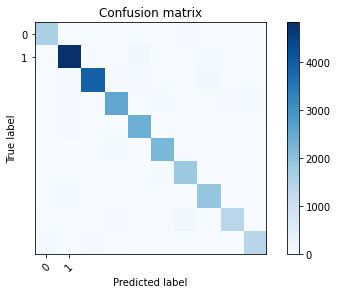

In [66]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cm, [0, 1])
plt.show()

In [0]:
prediction_array = model.predict(X_test)
predicted_class = np.argmax(prediction_array, axis=1)


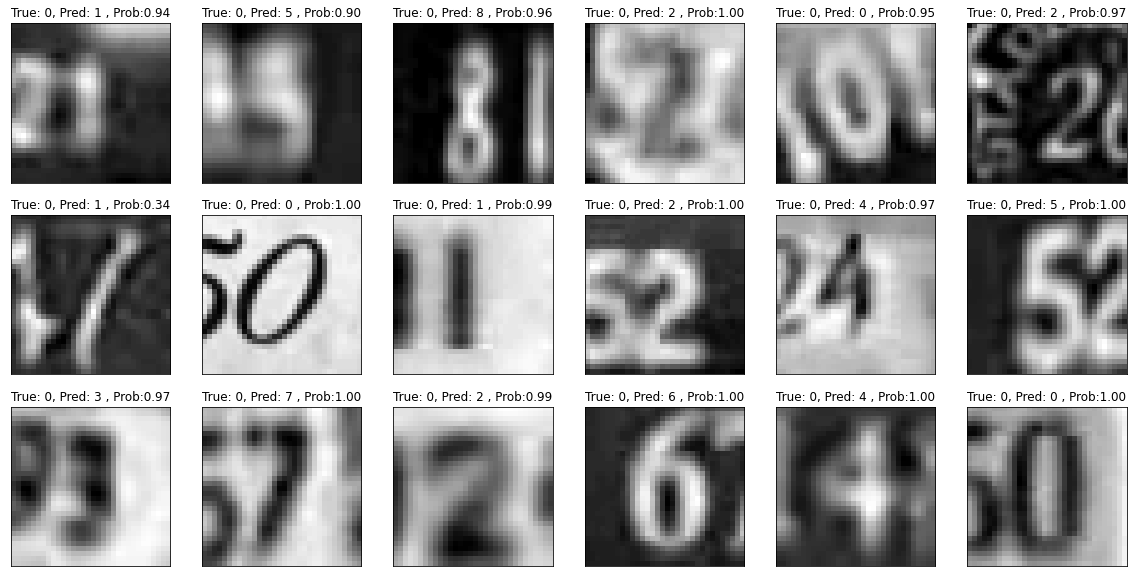

In [68]:
def plot_predicted_label(images, nrows, ncols, cls_true, cls_pred,prediction_array):
    fig, axes = plt.subplots(nrows, ncols,figsize=(20, 10))
    
    rs = np.random.choice(images.shape[0], nrows*ncols)
    
    for i, ax in zip(rs, axes.flat):
        prob = round(prediction_array[i][cls_pred[i]],2)
        title = 'True: %s, Pred: %s , Prob:%0.2f' % (np.argmax(cls_true[i]),cls_pred[i],prob)
        ax.imshow(images[i,:,:,0], cmap='binary')
        ax.set_title(title)
         
        ax.set_xticks([])
        ax.set_yticks([])


# ploat image with predicted and actual value
num_rows = 3
num_cols = 6
plot_predicted_label(X_test,num_rows, num_cols, y_test,predicted_class,prediction_array);